Import modules

In [1]:
%matplotlib inline
import os
from os.path import join, exists, expandvars
import pandas as pd
from IPython.display import display, Markdown
import seaborn
#import seaborn.xkcd_rgb as colors
from tax_credit.plotting_functions import (pointplot_from_data_frame,
                                           boxplot_from_data_frame,
                                           heatmap_from_data_frame,
                                           per_level_kruskal_wallis,
                                           beta_diversity_pcoa,
                                           average_distance_boxplots,
                                           rank_optimized_method_performance_by_dataset)
from tax_credit.eval_framework import (evaluate_results,
                                       method_by_dataset_a1,
                                       parameter_comparisons,
                                       merge_expected_and_observed_tables,
                                       filter_df)

Configure local environment-specific values

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## tax-credit-data repository. 
project_dir = expandvars('$HOME/tax-credit-data/')

## expected_results_dir contains expected composition data in the structure
## expected_results_dir/<dataset name>/<reference name>/expected/
expected_results_dir = join(project_dir, "data/precomputed-results/", "mock-community")

## mock_results_fp designates the files to which summary results are written.
## If this file exists, it can be read in to generate results plots, instead
## of computing new scores.
mock_results_fp = join(expected_results_dir, 'mock_results.tsv')

## results_dirs should contain the directory or directories where
## results can be found. By default, this is the same location as expected 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = [expected_results_dir]

## directory containing mock community data, e.g., feature table without taxonomy
mock_dir = join(project_dir, "data", "mock-community")

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

## Define the range of taxonomic levels over which to compute accuracy scores.
## The default given below will compute order (level 2) through species (level 6)
taxonomy_level_range = range(2,7)


# we can save plots in this directory
outdir = join(project_dir, "plots")
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [3]:
project_dir

'/home/mosele/tax-credit-data/'

In [4]:
#dataset_ids = ['mock-3']
dataset_ids = ['mock-1', 'mock-2', 'mock-3', 'mock-4', 'mock-5','mock-6', 'mock-7', 'mock-8','mock-12','mock-13',
               'mock-14', 'mock-15', 'mock-16','mock-18', 'mock-19', 'mock-20', 'mock-21', 'mock-22']
method_ids = ['naive-bayes-bespoke','naive-bayes','q2-NB','q2-UNI-C2', 
              'q2-UNI-FC', 'q2-UNI-MI', 'q2-SFM-RF', 'q2-SFM-SDG','q2-SFM-NB']
ref_ids = ['gg_13_8_otus']

Find mock community pre-computed tables, expected tables, and "query" tables

Note: if you have added additional methods to add, set append=True. If you are attempting to recompute pre-computed results, set force=True.

This cell will take a few minutes to run if new results are being added, so hold onto your hat. If you are attempting to re-compute everything, it may take an hour or so, so go take a nap.

In [5]:
mock_results = evaluate_results(results_dirs, 
                                expected_results_dir, 
                                mock_results_fp, 
                                mock_dir,
                                taxonomy_level_range=range(2,7), 
                                min_count=min_count,
                                taxa_to_keep=None, 
                                md_key='taxonomy', 
                                subsample=False,
                                per_seq_precision=True,
                                exclude=['other'],
                                dataset_ids=dataset_ids,
                                reference_ids=ref_ids,
                                method_ids=method_ids,
                                append=False,
                                force=True, #force=True the first time
                                backup=False)

Compute and summarize precision, recall, and F-measure for mock communities

In [6]:
color_palette={ 
    'naive-bayes-bespoke':'lightgray',
    'naive-bayes':'dimgray',
    'q2-NB':'black',
    'q2-UNI-C2':'darkgreen', 
    'q2-UNI-FC':'green',
    'q2-UNI-MI':'lime',
    'q2-SFM-RF':'darkred',
    'q2-SFM-SDG':'red',
    'q2-SFM-NB':'mistyrose',
    }

y_vars = ["Precision", "Recall", "F-measure", "Taxon Accuracy Rate", "Taxon Detection Rate"]

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


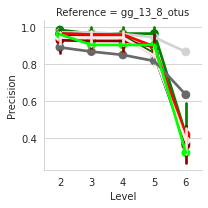

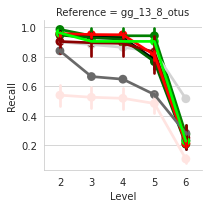

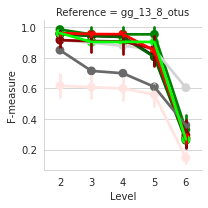

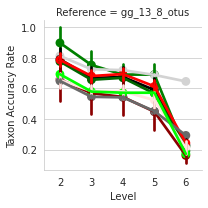

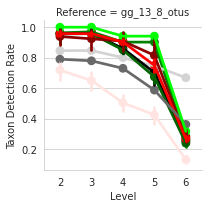

In [7]:
point = pointplot_from_data_frame(mock_results, "Level", y_vars, 
                                  group_by="Reference", color_by="Method",
                                  color_palette=color_palette)

In [8]:
for k, v in point.items():
    v.savefig(join(outdir, 'mock-{0}-lineplots.pdf'.format(k)))

Heatmaps show the performance of individual method/parameter combinations at each taxonomic level, in each reference database

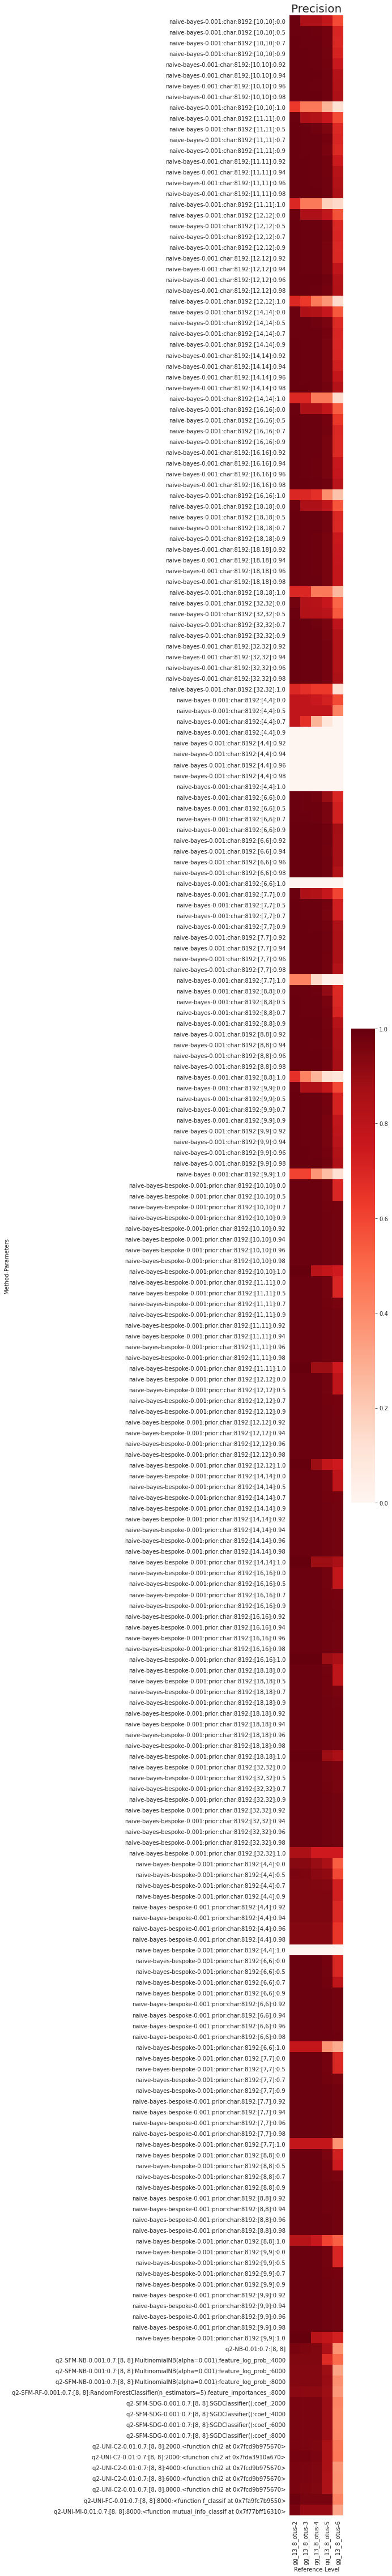

In [9]:
heatmap_from_data_frame(mock_results, metric="Precision", rows=["Method", "Parameters"], cols=["Reference", "Level"])

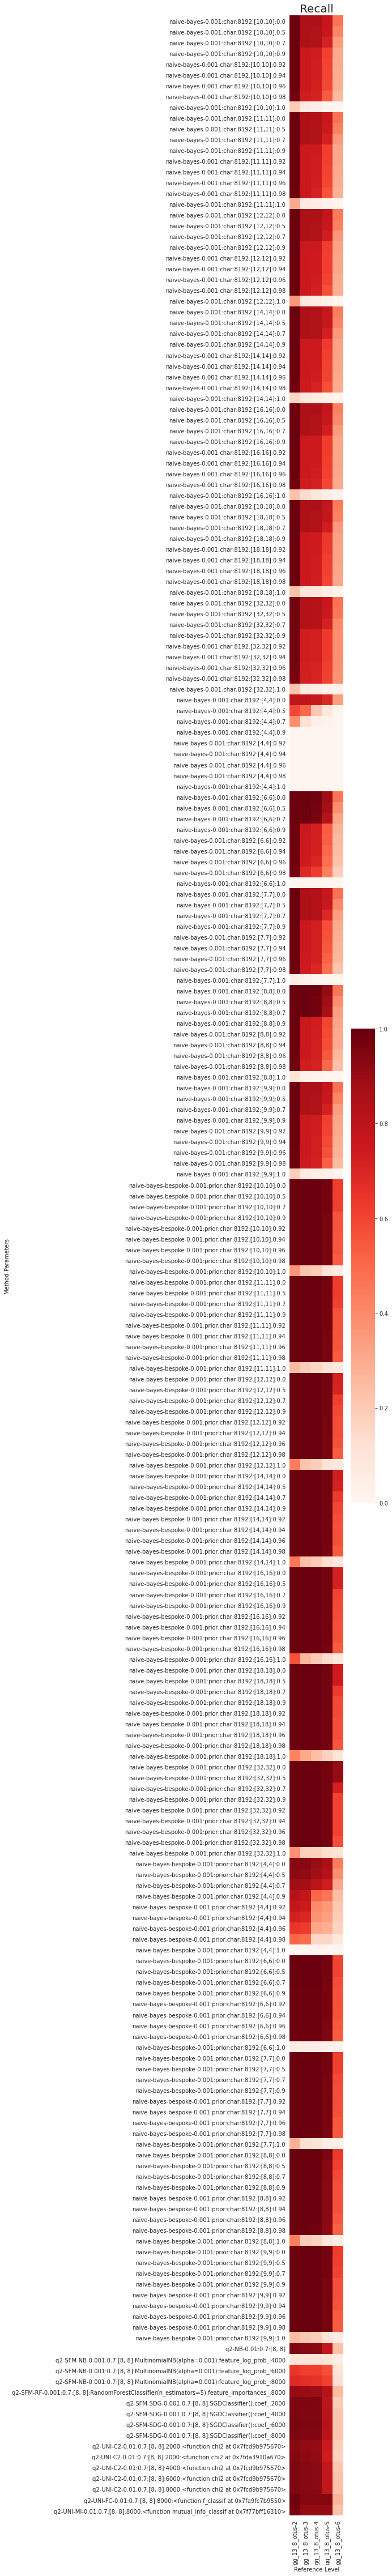

In [10]:
heatmap_from_data_frame(mock_results, metric="Recall", rows=["Method", "Parameters"], cols=["Reference", "Level"])

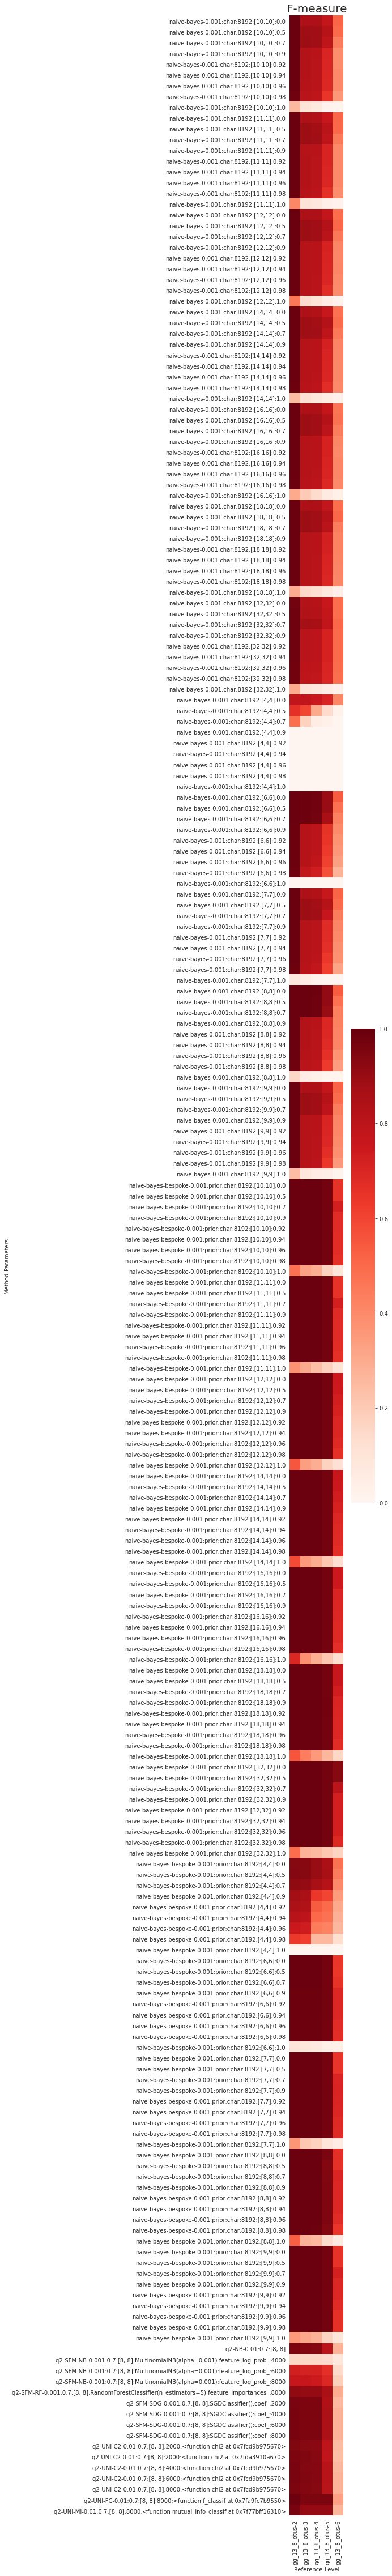

In [11]:
heatmap_from_data_frame(mock_results, metric="F-measure", rows=["Method", "Parameters"], cols=["Reference", "Level"])

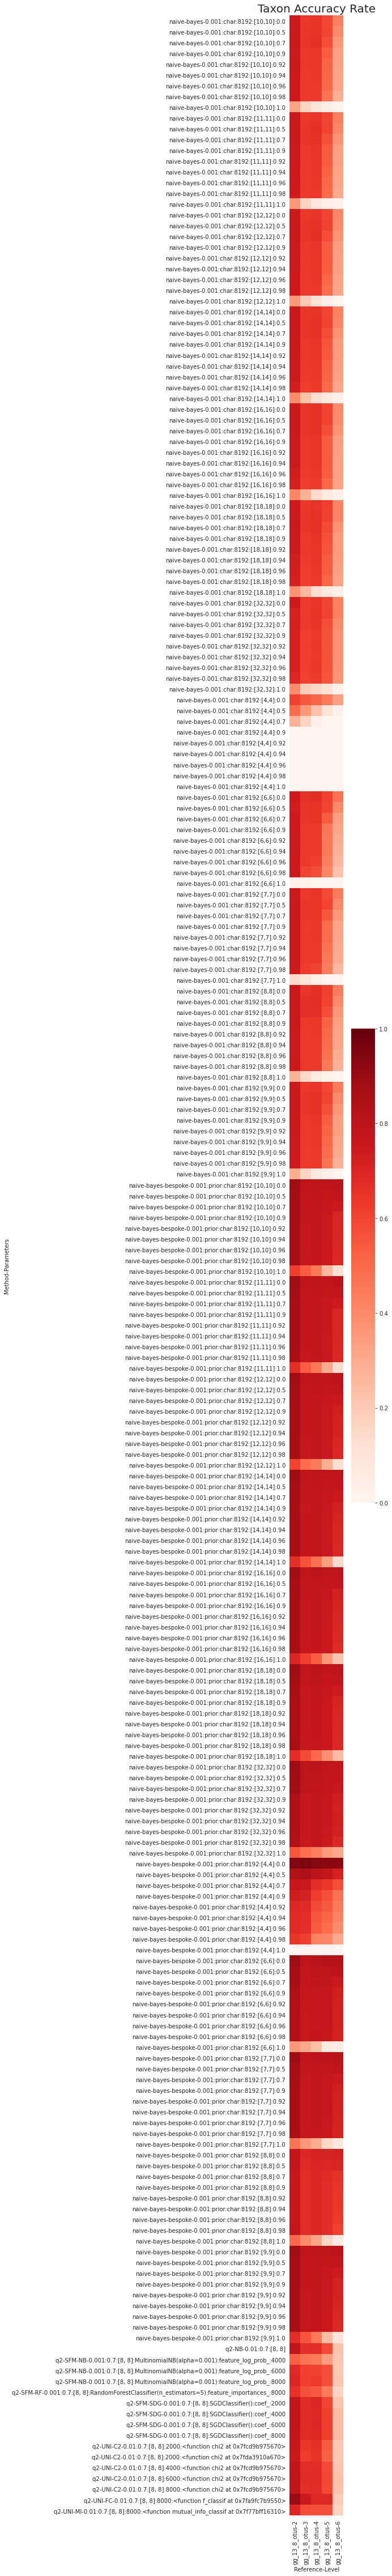

In [12]:
heatmap_from_data_frame(mock_results, metric="Taxon Accuracy Rate", rows=["Method", "Parameters"], cols=["Reference", "Level"])

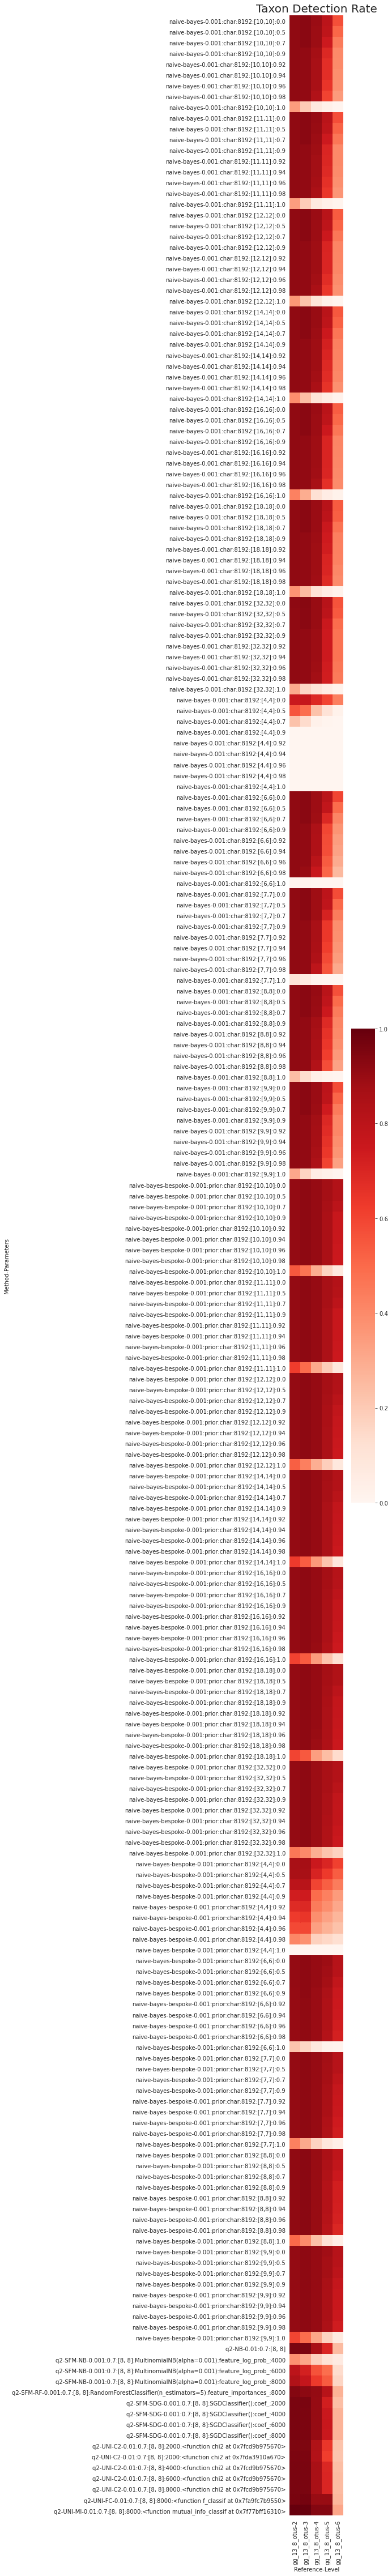

In [13]:
heatmap_from_data_frame(mock_results, metric="Taxon Detection Rate", rows=["Method", "Parameters"], cols=["Reference", "Level"])

now we will focus on results at species level (for genus level, change to level 5)

Method optimization

Which method/parameter configuration performed "best" for a given score? We can rank the top-performing configuration by dataset, method, and taxonomic level.

First, the top-performing method/configuration combination by dataset.

In [14]:
mock_results_6 = mock_results[mock_results['Level'] == 6]

pd.set_option('display.max_colwidth', None)
for dataset in mock_results_6['Dataset'].unique():
    display(Markdown('## {0}'.format(dataset)))
    best = method_by_dataset_a1(mock_results_6, dataset)
    display(best)

## mock-20

Method  \
544   naive-bayes-bespoke   
1099          naive-bayes   
569             q2-UNI-C2   
4               q2-UNI-FC   
549                 q2-NB   
574             q2-SFM-RF   
589            q2-SFM-SDG   
609             q2-SFM-NB   

                                                                             Parameters  \
544                                                     0.001:prior:char:8192:[6,6]:0.5   
1099                                                          0.001:char:8192:[6,6]:0.0   
569                              0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>   
4                           0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>   
549                                                                     0.01:0.7:[8, 8]   
574   0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
589                                         0.001:0.7:[8, 8]:SGDClassifier():coef_:6000   
609                  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   

      Precision    Recall  F-measure  Taxon Accuracy Rate  \
544    1.000000  1.000000   1.000000             0.772727   
1099   0.729441  0.621587   0.671209             0.521739   
569    0.389613  0.257116   0.309792             0.200000   
4      0.347760  0.257116   0.295646             0.217391   
549    0.347760  0.257116   0.295646             0.217391   
574    0.335834  0.237079   0.277945             0.208333   
589    0.315729  0.179479   0.228860             0.166667   
609    0.638303  0.119167   0.200839             0.250000   

      Taxon Detection Rate  
544               0.894737  
1099              0.631579  
569               0.263158  
4                 0.263158  
549               0.263158  
574               0.263158  
589               0.210526  
609               0.105263

## mock-3

Method  \
1449  naive-bayes-bespoke   
5508          naive-bayes   
3428            q2-UNI-C2   
3489           q2-SFM-SDG   
3329                q2-NB   
3549            q2-SFM-NB   

                                                              Parameters  \
1449                                   0.001:prior:char:8192:[14,14]:0.0   
5508                                           0.001:char:8192:[6,6]:0.0   
3428              0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>   
3489                         0.001:0.7:[8, 8]:SGDClassifier():coef_:6000   
3329                                                     0.01:0.7:[8, 8]   
3549  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

      Precision    Recall  F-measure  Taxon Accuracy Rate  \
1449   1.000000  1.000000   1.000000             1.000000   
5508   0.907022  0.304494   0.455929             0.538462   
3428   0.725018  0.128740   0.218654             0.285714   
3489   0.436794  0.131325   0.201937             0.214286   
3329   0.382944  0.127382   0.191173             0.214286   
3549   0.452312  0.068565   0.119079             0.083333   

      Taxon Detection Rate  
1449                  0.70  
5508                  0.35  
3428                  0.20  
3489                  0.15  
3329                  0.15  
3549                  0.05

## mock-2

Method  \
5714  naive-bayes-bespoke   
6744          naive-bayes   
6284           q2-SFM-SDG   
6274            q2-UNI-C2   
6254                q2-NB   
6309            q2-SFM-NB   

                                                              Parameters  \
5714                                   0.001:prior:char:8192:[12,12]:0.7   
6744                                         0.001:char:8192:[12,12]:0.5   
6284                         0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
6274              0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>   
6254                                                     0.01:0.7:[8, 8]   
6309  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

      Precision    Recall  F-measure  Taxon Accuracy Rate  \
5714   1.000000  0.905037   0.950152             0.650000   
6744   1.000000  0.862307   0.926063             0.533333   
6284   0.698939  0.502370   0.584572             0.361111   
6274   0.646275  0.479770   0.550712             0.294118   
6254   0.548368  0.497371   0.521626             0.315789   
6309   0.682014  0.352422   0.464711             0.352941   

      Taxon Detection Rate  
5714              0.702703  
6744              0.648649  
6284              0.351351  
6274              0.270270  
6254              0.324324  
6309              0.324324

## mock-21

Method  \
7154  naive-bayes-bespoke   
7949          naive-bayes   
7409            q2-UNI-C2   
7399                q2-NB   
6854            q2-UNI-FC   
7424            q2-SFM-RF   
7434           q2-SFM-SDG   
7459            q2-SFM-NB   

                                                                             Parameters  \
7154                                                  0.001:prior:char:8192:[10,10]:0.7   
7949                                                          0.001:char:8192:[6,6]:0.0   
7409                             0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>   
7399                                                                    0.01:0.7:[8, 8]   
6854                        0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>   
7424  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
7434                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:8000   
7459                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   

      Precision    Recall  F-measure  Taxon Accuracy Rate  \
7154   1.000000  1.000000   1.000000             0.761905   
7949   0.955869  0.552149   0.699968             0.523810   
7409   0.588483  0.337486   0.428967             0.181818   
7399   0.588483  0.337486   0.428967             0.181818   
6854   0.588483  0.337486   0.428967             0.181818   
7424   0.607315  0.328168   0.426093             0.181818   
7434   0.590315  0.302503   0.400019             0.136364   
7459   0.964215  0.003817   0.007604             0.166667   

      Taxon Detection Rate  
7154              0.842105  
7949              0.578947  
7409              0.210526  
7399              0.210526  
6854              0.210526  
7424              0.210526  
7434              0.157895  
7459              0.052632

## mock-18

Method  \
8154  naive-bayes-bespoke   
9024          naive-bayes   
8574            q2-SFM-RF   
8579           q2-SFM-SDG   
8569            q2-UNI-C2   
8544                q2-NB   
8604            q2-SFM-NB   

                                                                             Parameters  \
8154                                                    0.001:prior:char:8192:[6,6]:0.9   
9024                                                        0.001:char:8192:[18,18]:0.5   
8574  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
8579                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
8569                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>   
8544                                                                    0.01:0.7:[8, 8]   
8604                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

      Precision    Recall  F-measure  Taxon Accuracy Rate  \
8154   1.000000  0.942504   0.970401             0.750000   
9024   0.942771  0.888565   0.914866             0.647059   
8574   0.594823  0.435689   0.502970             0.294118   
8579   0.555375  0.435689   0.488305             0.263158   
8569   0.738105  0.319427   0.445889             0.307692   
8544   0.477651  0.320670   0.383726             0.277778   
8604   0.555356  0.247515   0.342419             0.300000   

      Taxon Detection Rate  
8154              0.800000  
9024              0.733333  
8574              0.333333  
8579              0.333333  
8569              0.266667  
8544              0.333333  
8604              0.200000

## mock-4

Method  \
10847  naive-bayes-bespoke   
12366          naive-bayes   
11429            q2-UNI-C2   
11509           q2-SFM-SDG   
11329                q2-NB   
11549            q2-SFM-NB   

                                                               Parameters  \
10847                                   0.001:prior:char:8192:[32,32]:0.5   
12366                                        0.001:char:8192:[32,32]:0.96   
11429              0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>   
11509                         0.001:0.7:[8, 8]:SGDClassifier():coef_:4000   
11329                                                     0.01:0.7:[8, 8]   
11549  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
10847   0.999752  0.999752   0.999752             0.863636   
12366   0.895793  0.378540   0.532190             0.434783   
11429   0.749195  0.135428   0.229390             0.222222   
11509   0.456148  0.137983   0.211874             0.222222   
11329   0.408736  0.135428   0.203447             0.200000   
11549   0.430019  0.071339   0.122376             0.150000   

       Taxon Detection Rate  
10847                  0.95  
12366                  0.50  
11429                  0.30  
11509                  0.30  
11329                  0.25  
11549                  0.15

## mock-19

Method  \
14174  naive-bayes-bespoke   
14729          naive-bayes   
14279            q2-SFM-RF   
14284           q2-SFM-SDG   
14274            q2-UNI-C2   
14254                q2-NB   
14314            q2-SFM-NB   

                                                                              Parameters  \
14174                                                   0.001:prior:char:8192:[6,6]:0.98   
14729                                                        0.001:char:8192:[18,18]:0.5   
14279  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
14284                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
14274                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>   
14254                                                                    0.01:0.7:[8, 8]   
14314                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
14174   0.758964  0.643289   0.696355             0.722222   
14729   0.686593  0.599645   0.640180             0.571429   
14279   0.376061  0.264054   0.310258             0.238095   
14284   0.350607  0.264054   0.301237             0.238095   
14274   0.376487  0.198346   0.259814             0.266667   
14254   0.288889  0.199192   0.235798             0.250000   
14314   0.000000  0.000000   0.000000             0.000000   

       Taxon Detection Rate  
14174              0.866667  
14729              0.800000  
14279              0.333333  
14284              0.333333  
14274              0.266667  
14254              0.333333  
14314              0.000000

## mock-15

Method  \
14869  naive-bayes-bespoke   
15314          naive-bayes   
14924            q2-UNI-C2   
14904                q2-NB   
14934            q2-SFM-RF   
14939           q2-SFM-SDG   
14969            q2-SFM-NB   

                                                                              Parameters  \
14869                                                    0.001:prior:char:8192:[8,8]:0.5   
15314                                                          0.001:char:8192:[4,4]:0.0   
14924                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>   
14904                                                                    0.01:0.7:[8, 8]   
14934  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
14939                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
14969                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
14869   0.998619  0.998389   0.998504             0.181818   
15314   0.735275  0.582599   0.650094             0.113208   
14924   0.344681  0.217090   0.266396             0.067568   
14904   0.284631  0.217090   0.246314             0.059524   
14934   0.185259  0.119300   0.145137             0.058824   
14939   0.189987  0.114401   0.142809             0.043956   
14969   0.622690  0.055743   0.102326             0.125000   

       Taxon Detection Rate  
14869                  0.90  
15314                  0.60  
14924                  0.25  
14904                  0.25  
14934                  0.25  
14939                  0.20  
14969                  0.10

## mock-5

Method  \
17207  naive-bayes-bespoke   
19286          naive-bayes   
17809           q2-SFM-SDG   
17769            q2-UNI-C2   
17689                q2-NB   
17887            q2-SFM-NB   

                                                               Parameters  \
17207                                   0.001:prior:char:8192:[32,32]:0.5   
19286                                           0.001:char:8192:[4,4]:0.0   
17809                         0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
17769              0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>   
17689                                                     0.01:0.7:[8, 8]   
17887  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:6000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
17207   0.998426  0.998426   0.998426             0.826087   
19286   0.840326  0.427025   0.566284             0.520000   
17809   0.795308  0.118820   0.206752             0.222222   
17769   0.788954  0.118820   0.206536             0.222222   
17689   0.548626  0.118919   0.195468             0.192308   
17887   0.108424  0.024474   0.039934             0.111111   

       Taxon Detection Rate  
17207                  0.95  
19286                  0.65  
17809                  0.30  
17769                  0.30  
17689                  0.25  
17887                  0.10

## mock-16

Method  \
20469  naive-bayes-bespoke   
20939          naive-bayes   
20674            q2-SFM-NB   
20654           q2-SFM-SDG   
20644            q2-SFM-RF   
20634            q2-UNI-C2   
20614                q2-NB   

                                                                              Parameters  \
20469                                                    0.001:prior:char:8192:[6,6]:0.7   
20939                                                        0.001:char:8192:[32,32]:0.5   
20674                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   
20654                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:8000   
20644  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
20634                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>   
20614                                                                    0.01:0.7:[8, 8]   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
20469   0.895613  0.877584   0.886507             0.547945   
20939   0.809916  0.755805   0.781925             0.392405   
20674   0.405749  0.157921   0.227354             0.196429   
20654   0.247365  0.189173   0.214390             0.157895   
20644   0.240698  0.157905   0.190703             0.135135   
20634   0.326154  0.125955   0.181730             0.089552   
20614   0.202410  0.152581   0.173998             0.126761   

       Taxon Detection Rate  
20469                  0.80  
20939                  0.62  
20674                  0.22  
20654                  0.24  
20644                  0.20  
20634                  0.12  
20614                  0.18

## mock-14

Method  \
21234  naive-bayes-bespoke   
21824          naive-bayes   
21289            q2-UNI-C2   
21269                q2-NB   
21299            q2-SFM-RF   
21304           q2-SFM-SDG   
21334            q2-SFM-NB   

                                                                              Parameters  \
21234                                                    0.001:prior:char:8192:[8,8]:0.5   
21824                                                          0.001:char:8192:[6,6]:0.0   
21289                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>   
21269                                                                    0.01:0.7:[8, 8]   
21299  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
21304                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
21334                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
21234   0.995178  0.991804   0.993488             0.187500   
21824   0.667191  0.533304   0.592781             0.127451   
21289   0.353082  0.211045   0.264183             0.064935   
21269   0.293797  0.211045   0.245639             0.058140   
21299   0.172160  0.100833   0.127178             0.054945   
21304   0.177573  0.095890   0.124532             0.043478   
21334   0.483385  0.032564   0.061017             0.125000   

       Taxon Detection Rate  
21234                  0.90  
21824                  0.65  
21289                  0.25  
21269                  0.25  
21299                  0.25  
21304                  0.20  
21334                  0.10

## mock-12

Method  \
22519          naive-bayes   
21889  naive-bayes-bespoke   
22444            q2-UNI-C2   
22484            q2-SFM-NB   
22454           q2-SFM-SDG   
22449            q2-SFM-RF   
22419                q2-NB   

                                                                              Parameters  \
22519                                                        0.001:char:8192:[10,10]:0.7   
21889                                                    0.001:prior:char:8192:[7,7]:0.5   
22444                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>   
22484                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   
22454                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
22449  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
22419                                                                    0.01:0.7:[8, 8]   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
22519   0.996677  0.954140   0.974945             0.309524   
21889   0.957738  0.957738   0.957738             0.393939   
22444   0.981570  0.519280   0.679228             0.222222   
22484   0.645720  0.518965   0.575445             0.500000   
22454   0.573474  0.519668   0.545247             0.263158   
22449   0.569751  0.519280   0.543346             0.225000   
22419   0.519349  0.519280   0.519315             0.243243   

       Taxon Detection Rate  
22519                  0.65  
21889                  0.65  
22444                  0.40  
22484                  0.30  
22454                  0.50  
22449                  0.45  
22419                  0.45

## mock-6

Method  \
23038  naive-bayes-bespoke   
24028          naive-bayes   
23263           q2-SFM-SDG   
23233            q2-UNI-C2   
23173                q2-NB   
23338            q2-SFM-NB   

                                                               Parameters  \
23038                                     0.001:prior:char:8192:[8,8]:0.0   
24028                                         0.001:char:8192:[12,12]:0.0   
23263                         0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
23233              0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>   
23173                                                     0.01:0.7:[8, 8]   
23338  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
23038   0.756847  0.406905   0.529262             0.536585   
24028   0.273440  0.273191   0.273316             0.114754   
23263   0.458479  0.141210   0.215917             0.083333   
23233   0.428898  0.135287   0.205692             0.057143   
23173   0.419932  0.134378   0.203603             0.075000   
23338   0.991078  0.023969   0.046807             0.100000   

       Taxon Detection Rate  
23038              0.407407  
24028              0.129630  
23263              0.074074  
23233              0.037037  
23173              0.055556  
23338              0.018519

## mock-8

Method  \
25797  naive-bayes-bespoke   
28032          naive-bayes   
26744           q2-SFM-SDG   
26639            q2-UNI-C2   
26609                q2-NB   
26774            q2-SFM-NB   

                                                               Parameters  \
25797                                   0.001:prior:char:8192:[16,16]:0.0   
28032                                         0.001:char:8192:[18,18]:0.5   
26744                         0.001:0.7:[8, 8]:SGDClassifier():coef_:4000   
26639              0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>   
26609                                                     0.01:0.7:[8, 8]   
26774  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
25797   0.985273  0.817671   0.893681             0.880000   
28032   0.978409  0.800016   0.880266             0.679245   
26744   0.772071  0.453526   0.571402             0.488372   
26639   0.596966  0.503740   0.546405             0.414634   
26609   0.596966  0.503740   0.546405             0.414634   
26774   0.747296  0.393981   0.515949             0.515152   

       Taxon Detection Rate  
25797              0.814815  
28032              0.666667  
26744              0.388889  
26639              0.314815  
26609              0.314815  
26774              0.314815

## mock-13

Method  \
28424  naive-bayes-bespoke   
28869          naive-bayes   
28479            q2-UNI-C2   
28459                q2-NB   
28489            q2-SFM-RF   
28494           q2-SFM-SDG   
28524            q2-SFM-NB   

                                                                              Parameters  \
28424                                                    0.001:prior:char:8192:[8,8]:0.5   
28869                                                          0.001:char:8192:[4,4]:0.0   
28479                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>   
28459                                                                    0.01:0.7:[8, 8]   
28489  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
28494                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:2000   
28524                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
28424   0.995136  0.992295   0.993713             0.236842   
28869   0.708109  0.550529   0.619455             0.144578   
28479   0.354105  0.215536   0.267966             0.083333   
28459   0.292898  0.215536   0.248331             0.071429   
28489   0.182767  0.110809   0.137969             0.067568   
28494   0.188599  0.105305   0.135149             0.051282   
28524   0.580176  0.045271   0.083988             0.142857   

       Taxon Detection Rate  
28424                  0.90  
28869                  0.60  
28479                  0.25  
28459                  0.25  
28489                  0.25  
28494                  0.20  
28524                  0.10

## mock-1

Method  \
30169          naive-bayes   
29069  naive-bayes-bespoke   
29649           q2-SFM-SDG   
29664            q2-SFM-NB   
29609                q2-NB   
29619            q2-UNI-C2   

                                                               Parameters  \
30169                                         0.001:char:8192:[11,11]:0.0   
29069                                   0.001:prior:char:8192:[12,12]:0.7   
29649                         0.001:0.7:[8, 8]:SGDClassifier():coef_:6000   
29664  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   
29609                                                     0.01:0.7:[8, 8]   
29619              0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
30169   0.801097  0.659208   0.723259             0.469388   
29069   0.911128  0.555923   0.690524             0.595745   
29649   0.617660  0.330199   0.430340             0.270270   
29664   0.499214  0.329244   0.396793             0.357143   
29609   0.421833  0.329244   0.369832             0.243902   
29619   0.421833  0.329244   0.369832             0.238095   

       Taxon Detection Rate  
30169              0.621622  
29069              0.756757  
29649              0.270270  
29664              0.270270  
29609              0.270270  
29619              0.270270

## mock-22

Method  \
30284  naive-bayes-bespoke   
31309          naive-bayes   
30799           q2-SFM-SDG   
30774            q2-UNI-C2   
30779            q2-SFM-RF   
30209            q2-UNI-FC   
30754                q2-NB   
30804            q2-UNI-MI   
30819            q2-SFM-NB   

                                                                              Parameters  \
30284                                                  0.001:prior:char:8192:[14,14]:0.0   
31309                                                          0.001:char:8192:[6,6]:0.0   
30799                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:4000   
30774                             0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>   
30779  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
30209                        0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>   
30754                                                                    0.01:0.7:[8, 8]   
30804              0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>   
30819                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
30284   0.999990  0.999990   0.999990             0.692308   
31309   0.774044  0.650819   0.707103             0.279070   
30799   0.363830  0.235989   0.286286             0.142857   
30774   0.366901  0.228384   0.281527             0.156250   
30779   0.326027  0.236062   0.273845             0.147059   
30209   0.319111  0.228407   0.266246             0.171429   
30754   0.319111  0.228407   0.266246             0.171429   
30804   0.319111  0.228407   0.266246             0.171429   
30819   0.685768  0.094711   0.166436             0.285714   

       Taxon Detection Rate  
30284              0.947368  
31309              0.631579  
30799              0.263158  
30774              0.263158  
30779              0.263158  
30209              0.315789  
30754              0.315789  
30804              0.315789  
30819              0.105263

## mock-7

Method  \
32182  naive-bayes-bespoke   
34417          naive-bayes   
33129           q2-SFM-SDG   
33024            q2-UNI-C2   
32994                q2-NB   
33159            q2-SFM-NB   

                                                               Parameters  \
32182                                   0.001:prior:char:8192:[16,16]:0.0   
34417                                         0.001:char:8192:[18,18]:0.5   
33129                         0.001:0.7:[8, 8]:SGDClassifier():coef_:4000   
33024              0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>   
32994                                                     0.01:0.7:[8, 8]   
33159  0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

       Precision    Recall  F-measure  Taxon Accuracy Rate  \
32182   0.979330  0.823178   0.894490             0.840000   
34417   0.936550  0.756941   0.837221             0.705882   
33129   0.706798  0.407071   0.516609             0.476190   
33024   0.572209  0.462501   0.511539             0.414634   
32994   0.559469  0.462501   0.506384             0.414634   
33159   0.690222  0.333210   0.449446             0.555556   

       Taxon Detection Rate  
32182              0.777778  
34417              0.666667  
33129              0.370370  
33024              0.314815  
32994              0.314815  
33159              0.277778

Now we can determine which parameter configuration performed best for each method. Count best values in each column indicate how many samples a given method achieved within one mean absolute deviation of the best result (which is why they may sum to more than the total number of samples).

In [15]:
for method in mock_results_6['Method'].unique():
    top_params = parameter_comparisons(
        mock_results_6, method, 
        metrics=['Taxon Accuracy Rate', 'Taxon Detection Rate', 'Precision', 'Recall', 'F-measure'])
    display(Markdown('## {0}'.format(method)))
    display(top_params[:5])

## q2-UNI-FC

Taxon Accuracy Rate  \
0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>                    3   

                                                             Taxon Detection Rate  \
0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>                     3   

                                                             Precision  \
0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>          3   

                                                             Recall  F-measure  
0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>       3          3

## naive-bayes-bespoke

Taxon Accuracy Rate  Taxon Detection Rate  \
0.001:prior:char:8192:[32,32]:0.0                 15.0                  27.0   
0.001:prior:char:8192:[32,32]:0.5                 14.0                  27.0   
0.001:prior:char:8192:[8,8]:0.0                   22.0                  33.0   
0.001:prior:char:8192:[18,18]:0.5                 14.0                  27.0   
0.001:prior:char:8192:[16,16]:0.0                 15.0                  27.0   

                                   Precision  Recall  F-measure  
0.001:prior:char:8192:[32,32]:0.0         23    27.0       27.0  
0.001:prior:char:8192:[32,32]:0.5         23    27.0       27.0  
0.001:prior:char:8192:[8,8]:0.0           10    21.0       20.0  
0.001:prior:char:8192:[18,18]:0.5         15    19.0       19.0  
0.001:prior:char:8192:[16,16]:0.0         15    19.0       19.0

## q2-NB

Taxon Accuracy Rate  Taxon Detection Rate  Precision  Recall  \
0.01:0.7:[8, 8]                   33                    33         33      33   

                 F-measure  
0.01:0.7:[8, 8]         33

## q2-UNI-C2

Taxon Accuracy Rate  \
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>                   14   
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>                   12   
0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>                   20   
0.01:0.7:[8, 8]:6000:<function chi2 at 0x7fcd9b975670>                   26   
0.01:0.7:[8, 8]:4000:<function chi2 at 0x7fcd9b975670>                   14   

                                                        Taxon Detection Rate  \
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>                    17   
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>                    15   
0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>                    28   
0.01:0.7:[8, 8]:6000:<function chi2 at 0x7fcd9b975670>                    30   
0.01:0.7:[8, 8]:4000:<function chi2 at 0x7fcd9b975670>                    21   

                                                        Precision  Recall  \
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>         26      19   
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>         22      17   
0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>          8      29   
0.01:0.7:[8, 8]:6000:<function chi2 at 0x7fcd9b975670>          7      31   
0.01:0.7:[8, 8]:4000:<function chi2 at 0x7fcd9b975670>          6      21   

                                                        F-measure  
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fcd9b975670>         26  
0.01:0.7:[8, 8]:2000:<function chi2 at 0x7fda3910a670>         22  
0.01:0.7:[8, 8]:8000:<function chi2 at 0x7fcd9b975670>          8  
0.01:0.7:[8, 8]:6000:<function chi2 at 0x7fcd9b975670>          8  
0.01:0.7:[8, 8]:4000:<function chi2 at 0x7fcd9b975670>          4

## q2-SFM-RF

Taxon Accuracy Rate  \
0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000                   10   

                                                                                   Taxon Detection Rate  \
0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000                    10   

                                                                                   Precision  \
0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000         10   

                                                                                   Recall  \
0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000      10   

                                                                                   F-measure  
0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000         10

## q2-SFM-SDG

Taxon Accuracy Rate  \
0.001:0.7:[8, 8]:SGDClassifier():coef_:8000                   29   
0.001:0.7:[8, 8]:SGDClassifier():coef_:4000                   29   
0.001:0.7:[8, 8]:SGDClassifier():coef_:6000                   28   
0.001:0.7:[8, 8]:SGDClassifier():coef_:2000                    6   

                                             Taxon Detection Rate  Precision  \
0.001:0.7:[8, 8]:SGDClassifier():coef_:8000                    33         17   
0.001:0.7:[8, 8]:SGDClassifier():coef_:4000                    33         14   
0.001:0.7:[8, 8]:SGDClassifier():coef_:6000                    33         15   
0.001:0.7:[8, 8]:SGDClassifier():coef_:2000                    11         16   

                                             Recall  F-measure  
0.001:0.7:[8, 8]:SGDClassifier():coef_:8000      27         23  
0.001:0.7:[8, 8]:SGDClassifier():coef_:4000      27         21  
0.001:0.7:[8, 8]:SGDClassifier():coef_:6000      27         21  
0.001:0.7:[8, 8]:SGDClassifier():coef_:2000      11         12

## q2-SFM-NB

Taxon Accuracy Rate  \
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000                   18   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:6000                   16   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000                   10   

                                                                    Taxon Detection Rate  \
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000                    33   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:6000                    24   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000                     7   

                                                                    Precision  \
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000         18   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:6000         12   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000         12   

                                                                    Recall  \
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000      32   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:6000      22   
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000       6   

                                                                    F-measure  
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000         22  
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:6000         15  
0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:4000          8

## naive-bayes

Taxon Accuracy Rate  Taxon Detection Rate  \
0.001:char:8192:[6,6]:0.0                   31.0                  32.0   
0.001:char:8192:[8,8]:0.0                   29.0                  32.0   
0.001:char:8192:[7,7]:0.0                   29.0                  32.0   
0.001:char:8192:[32,32]:0.7                 16.0                  16.0   
0.001:char:8192:[6,6]:0.5                   22.0                  21.0   

                             Precision  Recall  F-measure  
0.001:char:8192:[6,6]:0.0           20    23.0       23.0  
0.001:char:8192:[8,8]:0.0           16    22.0       22.0  
0.001:char:8192:[7,7]:0.0           16    25.0       21.0  
0.001:char:8192:[32,32]:0.7         28    19.0       20.0  
0.001:char:8192:[6,6]:0.5           18    15.0       20.0

## q2-UNI-MI

Taxon Accuracy Rate  \
0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>                    1   

                                                                       Taxon Detection Rate  \
0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>                     1   

                                                                       Precision  \
0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>          1   

                                                                       Recall  \
0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>       1   

                                                                       F-measure  
0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>          1

Optimized method performance

And, finally, which method performed best at each individual taxonomic level for each reference dataset (i.e., for across all fungal and bacterial mock communities combined)?

For this analysis, we rank the top-performing method/parameter combination for each method at family through species levels. Methods are ranked by top F-measure, and the average value for each metric is shown (rather than count best as above). F-measure distributions are plotted for each method, and compared using paired t-tests with FDR-corrected P-values. This cell does not need to be altered, unless if you wish to change the metric used for sorting best methods and for plotting.

## gg_13_8_otus level 4

Method  \
1  naive-bayes-bespoke   
0          naive-bayes   
5           q2-SFM-SDG   
7            q2-UNI-FC   
6            q2-UNI-C2   
2                q2-NB   
4            q2-SFM-RF   
8            q2-UNI-MI   
3            q2-SFM-NB   

                                                                          Parameters  \
1                                                   0.001:prior:char:8192:[8,8]:0.96   
0                                                          0.001:char:8192:[8,8]:0.0   
5                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:6000   
7                        0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>   
6                             0.01:0.7:[8, 8]:6000:<function chi2 at 0x7fcd9b975670>   
2                                                                    0.01:0.7:[8, 8]   
4  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
8              0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>   
3                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

   Taxon Accuracy Rate  Taxon Detection Rate  Precision    Recall  F-measure  
1             0.692547              0.901300   0.991745  0.989580   0.990646  
0             0.662433              0.904126   0.987778  0.987778   0.987778  
5             0.692780              0.903777   0.960179  0.950018   0.954765  
7             0.690058              0.901961   0.965311  0.941861   0.953183  
6             0.678418              0.862858   0.951863  0.927012   0.938952  
2             0.674754              0.860435   0.948584  0.926402   0.937103  
4             0.543622              0.908506   0.925392  0.890239   0.906560  
8             0.571429              0.941176   0.903779  0.903751   0.903765  
3             0.625236              0.632069   0.944451  0.659898   0.742496

stat             P     FDR P
Method A            Method B                                             
q2-UNI-FC           naive-bayes-bespoke  0.000000  1.000000e+00  1.000000
                    q2-NB                0.000000  1.000000e+00  1.000000
                    q2-UNI-C2            0.000000  1.000000e+00  1.000000
                    q2-SFM-RF            0.000000  1.000000e+00  1.000000
                    q2-SFM-SDG           0.000000  1.000000e+00  1.000000
                    q2-SFM-NB            0.000000  1.000000e+00  1.000000
                    naive-bayes          0.000000  1.000000e+00  1.000000
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000
naive-bayes-bespoke q2-NB                6.964277  6.878416e-08  0.000001
                    q2-UNI-C2            7.065858  5.167587e-08  0.000001
                    q2-SFM-RF            0.000000  1.000000e+00  1.000000
                    q2-SFM-SDG           5.057356  1.681963e-05  0.000076
                    q2-SFM-NB            5.592555  3.541863e-06  0.000018
                    naive-bayes          1.594822  1.205826e-01  0.289398
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000
q2-NB               q2-UNI-C2           -1.746595  9.030144e-02  0.232204
                    q2-SFM-RF            0.000000  1.000000e+00  1.000000
                    q2-SFM-SDG          -5.935486  1.308387e-06  0.000009
                    q2-SFM-NB            4.660332  5.318714e-05  0.000160
                    naive-bayes         -6.621188  1.820144e-07  0.000002
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000
q2-UNI-C2           q2-SFM-RF            0.000000  1.000000e+00  1.000000
                    q2-SFM-SDG          -4.557556  7.153984e-05  0.000198
                    q2-SFM-NB            4.732261  4.320159e-05  0.000156
                    naive-bayes         -6.768450  1.197126e-07  0.000001
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000
q2-SFM-RF           q2-SFM-SDG           0.000000  1.000000e+00  1.000000
                    q2-SFM-NB            0.000000  1.000000e+00  1.000000
                    naive-bayes          0.000000  1.000000e+00  1.000000
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000
q2-SFM-SDG          q2-SFM-NB            5.005996  1.952838e-05  0.000078
                    naive-bayes         -4.678465  5.047258e-05  0.000160
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000
q2-SFM-NB           naive-bayes         -5.688600  2.678760e-06  0.000016
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000
naive-bayes         q2-UNI-MI            0.000000  1.000000e+00  1.000000

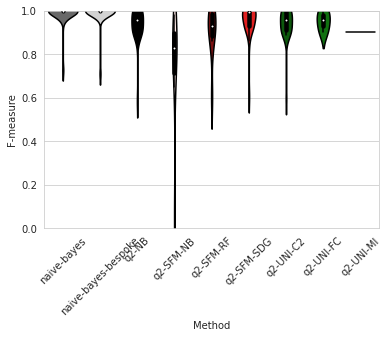

## gg_13_8_otus level 5

Method  \
1  naive-bayes-bespoke   
7            q2-UNI-FC   
0          naive-bayes   
8            q2-UNI-MI   
4            q2-SFM-RF   
5           q2-SFM-SDG   
6            q2-UNI-C2   
2                q2-NB   
3            q2-SFM-NB   

                                                                          Parameters  \
1                                                 0.001:prior:char:8192:[18,18]:0.92   
7                        0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>   
0                                                          0.001:char:8192:[8,8]:0.5   
8              0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>   
4  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
5                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:6000   
6                             0.01:0.7:[8, 8]:4000:<function chi2 at 0x7fcd9b975670>   
2                                                                    0.01:0.7:[8, 8]   
3                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

   Taxon Accuracy Rate  Taxon Detection Rate  Precision    Recall  F-measure  
1             0.752418              0.851448   0.982987  0.971489   0.977094  
7             0.690058              0.901961   0.965311  0.941861   0.953183  
0             0.605477              0.786778   0.962407  0.885948   0.912765  
8             0.571429              0.941176   0.903779  0.903751   0.903765  
4             0.447229              0.815147   0.892976  0.830955   0.858010  
5             0.619839              0.757937   0.896158  0.817086   0.851203  
6             0.588540              0.696293   0.859820  0.782995   0.816277  
2             0.589262              0.701995   0.846124  0.781390   0.809425  
3             0.575229              0.540662   0.895293  0.614036   0.694572

stat             P         FDR P
Method A            Method B                                                 
q2-UNI-FC           naive-bayes-bespoke  0.000000  1.000000e+00  1.000000e+00
                    q2-NB                0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-C2            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-RF            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG           0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-NB            0.000000  1.000000e+00  1.000000e+00
                    naive-bayes          0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00
naive-bayes-bespoke q2-NB                0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-C2            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-RF            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG           0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-NB            0.000000  1.000000e+00  1.000000e+00
                    naive-bayes          0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00
q2-NB               q2-UNI-C2           -4.153650  2.270067e-04  9.080269e-04
                    q2-SFM-RF            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG          -4.326248  1.389136e-04  7.144127e-04
                    q2-SFM-NB            4.194641  2.020872e-04  9.080269e-04
                    naive-bayes         -5.288253  8.589436e-06  8.911482e-05
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00
q2-UNI-C2           q2-SFM-RF            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG          -3.923841  4.335890e-04  1.560920e-03
                    q2-SFM-NB            4.520816  7.952019e-05  5.725454e-04
                    naive-bayes         -5.239427  9.901646e-06  8.911482e-05
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00
q2-SFM-RF           q2-SFM-SDG           0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-NB            0.000000  1.000000e+00  1.000000e+00
                    naive-bayes          0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00
q2-SFM-SDG          q2-SFM-NB            6.248938  5.290085e-07  9.522152e-06
                    naive-bayes         -4.370020  1.225731e-04  7.144127e-04
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00
q2-SFM-NB           naive-bayes         -9.041580  2.511880e-10  9.042770e-09
                    q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00
naive-bayes         q2-UNI-MI            0.000000  1.000000e+00  1.000000e+00

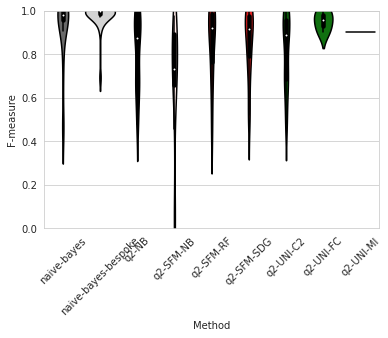

## gg_13_8_otus level 6

Method  \
1  naive-bayes-bespoke   
0          naive-bayes   
7            q2-UNI-FC   
4            q2-SFM-RF   
5           q2-SFM-SDG   
6            q2-UNI-C2   
2                q2-NB   
8            q2-UNI-MI   
3            q2-SFM-NB   

                                                                          Parameters  \
1                                                  0.001:prior:char:8192:[32,32]:0.5   
0                                                          0.001:char:8192:[6,6]:0.0   
7                        0.01:0.7:[8, 8]:8000:<function f_classif at 0x7fa9fc7b9550>   
4  0.001:0.7:[8, 8]:RandomForestClassifier(n_estimators=5):feature_importances_:8000   
5                                        0.001:0.7:[8, 8]:SGDClassifier():coef_:8000   
6                             0.01:0.7:[8, 8]:6000:<function chi2 at 0x7fcd9b975670>   
2                                                                    0.01:0.7:[8, 8]   
8              0.01:0.7:[8, 8]:8000:<function mutual_info_classif at 0x7f77bff16310>   
3                 0.001:0.7:[8, 8]:MultinomialNB(alpha=0.001):feature_log_prob_:8000   

   Taxon Accuracy Rate  Taxon Detection Rate  Precision    Recall  F-measure  
1             0.775844              0.827298   0.965121  0.910124   0.934532  
0             0.471707              0.597850   0.705661  0.464156   0.540132  
7             0.190213              0.263158   0.418452  0.274336   0.330286  
4             0.161089              0.280351   0.359069  0.250918   0.293544  
5             0.250867              0.276876   0.417936  0.218682   0.278605  
6             0.231170              0.253771   0.376128  0.232688   0.275526  
2             0.228958              0.252615   0.369943  0.232531   0.274125  
8             0.171429              0.315789   0.319111  0.228407   0.266246  
3             0.215386              0.160942   0.385875  0.136275   0.181635

stat             P         FDR P
Method A            Method B                                                  
q2-UNI-FC           naive-bayes-bespoke   0.000000  1.000000e+00  1.000000e+00
                    q2-NB                 0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-C2             0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-RF             0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-NB             0.000000  1.000000e+00  1.000000e+00
                    naive-bayes           0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00
naive-bayes-bespoke q2-NB                 0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-C2             0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-RF             0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-NB             0.000000  1.000000e+00  1.000000e+00
                    naive-bayes           0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00
q2-NB               q2-UNI-C2            -2.553869  1.561767e-02  7.027951e-02
                    q2-SFM-RF             0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG           -0.549460  5.865045e-01  1.000000e+00
                    q2-SFM-NB             5.836153  1.745102e-06  8.974811e-06
                    naive-bayes         -13.912163  4.052070e-15  5.537138e-14
                    q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00
q2-UNI-C2           q2-SFM-RF             0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-SDG           -0.385500  7.024179e-01  1.000000e+00
                    q2-SFM-NB             5.947273  1.264463e-06  7.586779e-06
                    naive-bayes         -13.846764  4.614282e-15  5.537138e-14
                    q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00
q2-SFM-RF           q2-SFM-SDG            0.000000  1.000000e+00  1.000000e+00
                    q2-SFM-NB             0.000000  1.000000e+00  1.000000e+00
                    naive-bayes           0.000000  1.000000e+00  1.000000e+00
                    q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00
q2-SFM-SDG          q2-SFM-NB             6.981169  6.558494e-08  4.722116e-07
                    naive-bayes         -12.433736  8.552882e-14  7.697594e-13
                    q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00
q2-SFM-NB           naive-bayes         -15.263339  3.044021e-16  1.095848e-14
                    q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00
naive-bayes         q2-UNI-MI             0.000000  1.000000e+00  1.000000e+00

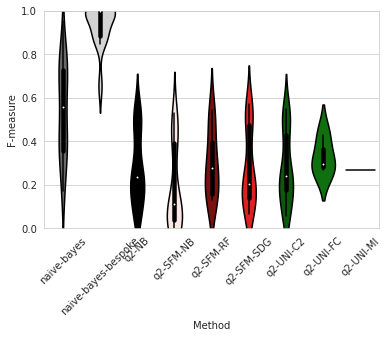

In [16]:
boxes = rank_optimized_method_performance_by_dataset(mock_results,
                                                     dataset="Reference",
                                                     metric="F-measure",
                                                     level_range=range(4,7),
                                                     display_fields=["Method",
                                                                     "Parameters",
                                                                     "Taxon Accuracy Rate",
                                                                     "Taxon Detection Rate",
                                                                     "Precision",
                                                                     "Recall",
                                                                     "F-measure"],
                                                     paired=True,
                                                     parametric=True,
                                                     color=None,
                                                     color_palette=color_palette)